# Imports

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Question 1

In [2]:
# Read Data
df = pd.read_stata('data\war_pre_snapshots.dta')

In [3]:
df.columns

Index(['id', 'cname', 'ccode', 'date0', 'date1', 'UN', 'inter', 'deaths',
       'couprev', 'sos', 'drugs', 'ethfrac', 'pop', 'lmtnest', 'milper',
       'eeurop', 'lamerica', 'asia', 'ssafrica', 'nafrme', 't0', '_st', 't',
       '_d', 'dur', 'ldur'],
      dtype='object')

In [4]:
df.drop(columns=['id','date0', 'date1','_st','t0','t','dur','ccode','cname'],inplace = True)

In [5]:
df.head()

,UN,inter,deaths,couprev,sos,drugs,ethfrac,pop,lmtnest,milper,eeurop,lamerica,asia,ssafrica,nafrme,_d,ldur
0,0.0,0.0,5.521461,1.0,0.0,0.0,1.359123,8.793764,2.797281,2.079442,0.0,1.0,0.0,0.0,0.0,1,2.397895
1,0.0,0.0,6.214608,0.0,0.0,0.0,64.368416,9.028818,3.763523,3.761200,0.0,1.0,0.0,0.0,0.0,1,4.553877
2,1.0,0.0,5.010635,0.0,0.0,0.0,16.591871,8.557567,2.424803,4.094345,0.0,1.0,0.0,0.0,0.0,1,1.609438
3,0.0,0.0,8.006368,0.0,0.0,1.0,17.932869,8.204125,2.332144,4.304065,0.0,1.0,0.0,0.0,0.0,1,3.135494
4,0.0,0.0,6.570883,0.0,0.0,1.0,6.015271,10.422281,3.640214,4.330733,0.0,1.0,0.0,0.0,0.0,0,5.252274


In [6]:
outcome_variable = 'ldur'
treatment_variable = 'UN'
covariates = ['inter', 'deaths', 'couprev', 'sos','ethfrac' ,'drugs', 'pop', 'lmtnest',
              'milper', 'eeurop', 'lamerica', 'asia', 'ssafrica', 'nafrme', '_d',]

Normalizing the DataFrame

In [7]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)

In [8]:
df.head()

,UN,inter,deaths,couprev,sos,drugs,ethfrac,pop,lmtnest,milper,eeurop,lamerica,asia,ssafrica,nafrme,_d,ldur
0,0.0,0.0,0.512212,1.0,0.0,0.0,0.009609,0.344594,0.634776,0.287048,0.0,1.0,0.0,0.0,0.0,1.0,0.456544
1,0.0,0.0,0.576513,0.0,0.0,0.0,0.712323,0.376169,0.854042,0.519200,0.0,1.0,0.0,0.0,0.0,1.0,0.867030
2,1.0,0.0,0.464824,0.0,0.0,0.0,0.179493,0.312865,0.550251,0.565187,0.0,1.0,0.0,0.0,0.0,1.0,0.306427
3,0.0,0.0,0.742730,0.0,0.0,1.0,0.194449,0.265387,0.529225,0.594137,0.0,1.0,0.0,0.0,0.0,1.0,0.596978
4,0.0,0.0,0.609564,0.0,0.0,1.0,0.061537,0.563354,0.826060,0.597818,0.0,1.0,0.0,0.0,0.0,0.0,1.000000


# Question 2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11760\2598890162.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated_data['propensity_score'], label='Treated', shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11760\2598890162.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(control_data['propensity_score'], label='Control', shade=True)


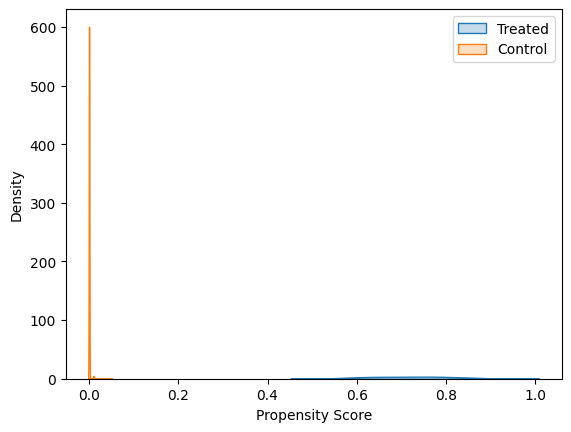

In [9]:
X = df[covariates]
treatment = df['UN']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, treatment)

# Predict propensity scores
df['propensity_score'] = rf_model.predict_proba(X)[:, 1]

# Create Density Plots
treated_data = df[df[treatment_variable] == 1]
control_data = df[df[treatment_variable] == 0]

sns.kdeplot(treated_data['propensity_score'], label='Treated', shade=True)
sns.kdeplot(control_data['propensity_score'], label='Control', shade=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [10]:
print(df[treatment_variable].value_counts())

UN
0.0    1211
1.0      16
Name: count, dtype: int64


**Density Plot Skewed Towards One Group, it indicates a lack of balance in covariates between the groups.**<br>
**Overlap Assumption is violated. There are regions of the covariate space where one group has a lower probability to receive the treatment compared to the other, violating the overlap assumption.**

# Question 3

In [11]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': covariates, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

     Feature  Importance
8     milper    0.252799
7    lmtnest    0.176025
6        pop    0.168101
1     deaths    0.131480
4    ethfrac    0.124662
9     eeurop    0.030165
0      inter    0.024619
5      drugs    0.023682
3        sos    0.016199
2    couprev    0.012553
12  ssafrica    0.012173
13    nafrme    0.010824
11      asia    0.005813
14        _d    0.005678
10  lamerica    0.005229


* **milper (Military Personnel) has the highest importance score. pop (Population) and lmtnest (Log of Mountainous and Desert Terrain Area) also have relatively high importance scores.**
* **Gini importance measure was used. It is computed based on the total decrease in node impurity (typically Gini impurity) weighted by the probability of reaching that node.**
* **It is sensible that as the UN intervenes when the country at conflict has a large number of Military Personnel and population.**

# Question 4

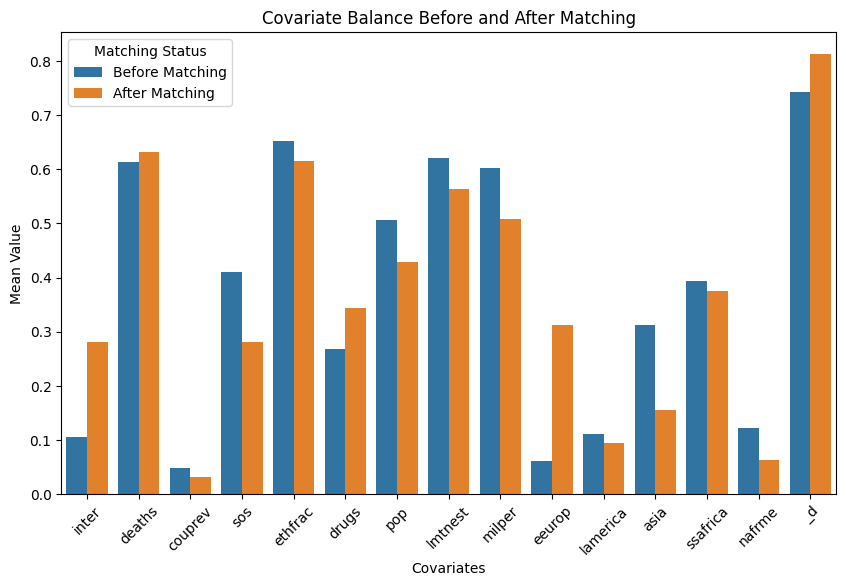

In [12]:
# Implement one-to-one matching and check covariate balance
propensity_scores = df['propensity_score']
treated_group = df[df[treatment_variable] == 1]
control_group = df[df[treatment_variable] == 0]

# Reshape the propensity scores for compatibility with NearestNeighbors
propensity_scores = propensity_scores.values.reshape(-1, 1)

# Use Nearest Neighbors to perform one-to-one matching
nn = NearestNeighbors(n_neighbors=1)
nn.fit(propensity_scores)

# Find the nearest neighbors for the treated group
distances, indices = nn.kneighbors(propensity_scores[treated_group.index])

# Extract matched control group indices
matched_control_indices = indices.flatten()

# Create matched datasets
matched_treated = treated_group.copy()
matched_control = control_group.iloc[matched_control_indices]

# Combine matched datasets
matched_data = pd.concat([matched_treated, matched_control])

# Check balance on pre-treatment covariates
covariate_balance = pd.DataFrame({
    'Covariate': covariates,
    'Before Matching': df[covariates].mean(),
    'After Matching': matched_data[covariates].mean()
})

# Melt the DataFrame
covariate_balance_melted = covariate_balance.melt(id_vars='Covariate', var_name='Matching Status', value_name='Mean Value')

# Plot covariate balance
plt.figure(figsize=(10, 6))
sns.barplot(x='Covariate', y='Mean Value', hue='Matching Status', data=covariate_balance_melted)
plt.title('Covariate Balance Before and After Matching')
plt.ylabel('Mean Value')
plt.xlabel('Covariates')
plt.xticks(rotation=45)
plt.show()

* **It improved the balance of the pre-treatment covariates.**
* **If the mean increases then their is a potential imbalance after matching, if the mean decreaased then it successfully improved the balance**
* **Some covariate got worse specially "inter" and eeurop**
* **Most of them got improved specially "asia" and "sos"**
* **Overall the number of covariates that got improved is more than the ones that got imbalanced which proves that matching helped in improving the quality of the data**

# Question 5

* **Tried to use a package that converts r libraries to python but it didn't work.**
* **The microsoft library (econml) I tried to use, unfortunately the only example that exists, uses an older version. Even when I tried to get the exact version used in the example, it didn't work.**

In [ ]:
# ! pip install rpy2
# ! pip install causalinference
# !pip install econml==0.10.0
# ! pip install grf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 912.0 kB/s eta 0:00:00


In [ ]:
from econml.dml import CausalForestDML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame

# Select relevant columns
data = df[covariates + [outcome_variable, treatment_variable]]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Specify the treatment effect model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Initialize the CausalForestDML model with hyperparameters
cf_model = CausalForestDML()

# Fit the CausalForestDML model
cf_model.fit(Y=train_data[outcome_variable], T=train_data[treatment_variable], X=train_data[covariates])

# Estimate treatment effects on the test set
treatment_effects = cf_model.effect(test_data[covariates])

# Analyze and interpret the results
# ...

# Access other model attributes if needed
# print(cf_model.summary())
# print(cf_model.get_importance())


In [ ]:
  # cf_model.summary()

Population summary results are available only if `cache_values=True` at fit time!
Doubly Robust ATE on Training Data Results:  Doubly Robust ATE calculation on training data is available only on discrete treatments!
Doubly Robust ATT on Training Data Results:  Doubly Robust ATT calculation on training data is available only on discrete treatments!


In [ ]:
# cf_model.get_importance()

AttributeError: ignored